In [ ]:
### Calculation of migration barriers using NEB method
In this example we show how to calculate migration barrier on the example of LiFePO4

## Important notes

- Creation of intermediate images on server is done with [nebmake.pl] and [vasp.pm] (https://theory.cm.utexas.edu/code/vtstscripts.tgz) script. By using *add_neb(upload_vts = 1)* it will be uploaded to  ~/tools/vts/ otherwise do it manually

- initialize header.PATH2NEBMAKE constant with path to nebmake.pl; either in header.py or project_conf.py

- To use void search you should compile *findpores.cpp*. For linux use *make_findpores* script in siman folder. Fow windows use *make_findpores.bat* (mingw64v5.2 or Visuall C++ should be installed).


In [1]:
import sys
sys.path.append('/home/aksenov/Simulation_wrapper/siman')
from SSHTools import SSHTools
import header
from calc_manage import add_loop, res_loop, smart_structure_read
from database import write_database, read_database
from set_functions import read_vasp_sets
from neb import add_neb
%matplotlib inline

In [2]:
header.ssh_object = SSHTools()
header.ssh_object.setup(user="aksenov",host="10.30.16.62",pkey="/home/aksenov/.ssh/id_rsa")

header.PATH2PROJECT    = 'neb' # path to project relative to your home folder on cluster
header.PATH2POTENTIALS = '/home/aksenov/scientific_projects/PAW_PBE_VASP' #path to VASP POTENTIALS

header.varset['static'].potdir = {3:'Li', 26:'Fe', 15:'P', 8:'O'} #subfolders with required potentials
read_vasp_sets([('ion_relax', 'static', {'ISIF':2, 'IBRION':1, 'NSW':20, 'EDIFFG':-0.025}, 'override')]) #new set 'ion_relax' from 'static' with 'NSW' = 20


Attention! You have chosen to override set ion_relax
 

Warning! You did not change  ISIF  in ion_relax set
 

Warning! You did not change  IBRION  in ion_relax set
 



{'static': <set_functions.InputSet at 0x7f2620341fd0>,
 'ion_relax': <set_functions.InputSet at 0x7f265c486438>}

In [3]:
st = smart_structure_read(input_geo_file = 'in/mp-19017.POSCAR') #read LiFePO4 structure

-- You provided the following geo file explicitly  in/mp-19017.POSCAR ; Version of file does not matter, I use *curver*= 1 as a new version 



### Create Initial and Final configurations and run on server
Function add_neb() creates start and end configurations by removing or adding alkali ion atoms.
The start and end configurations have 1 and 2 version numbers, respectively.
All intermidiate images have version numbers starting from 3.
Before setting *run = 1* you can check created configurations in xyz folder: mp-19017_start.xyz and mp-19017_end.xyz
    
- *it_new* and *it_new_folder* are name and folder for new calculation. 
- *ise_new* is set with VASP parameters defined above.
- *images* is number of images and *corenum* is number of cores used for calculation; should be dividable by images.
- *upload_vts = 1* upload nebmake.pl to server.

In [4]:
add_neb(st = st, it_new = 'LiFePO4', ise_new = 'ion_relax', it_new_folder = 'LiFePO4/neb',
        images = 3, corenum = 15, upload_vts = 0, run = 0)                


-- You have chosen vacancy_creation mode of add_neb tool 

-- Type of atom to move =  Li 

I can suggest you 4 end positions. The distances to them are : [ 0.    3.04  5.74  6.5 ] A
  They are all Li atoms 

-- File xyz/mp-19017_start.xyz was written 

-- File xyz/mp-19017_end.xyz was written 

-- Creating geo files for starting and final configurations (versions 1 and 2)  

-- Warning! File ./LiFePO4/neb/LiFePO4.n3Li1v1/LiFePO4.n3Li1v1.auto_created_starting_position_for_neb_vacancy_creation.1.geo was replaced 

-- Warning! File ./LiFePO4/neb/LiFePO4.n3Li1v1/LiFePO4.n3Li1v1.auto_created_final_position_for_neb_vacancy_creation.2.geo was replaced 

-- Attention, I update number of images in the set to 3 for this calculation;  

-- check_kpoints(): Kpoint   mesh is:  [3, 5, 6] 

-- check_kpoints(): The actual k-spacings are  [ 0.2   0.21  0.22] 


Calculation ('LiFePO4.n3Li1v1', 'ion_relax', 1) successfully created

 

-- check_kpoints(): Kpoint   mesh is:  [3, 5, 6] 

-- check_kpoints():

'LiFePO4.n3Li1v1'



Max. F. tot  (meV/A) = 
[1845 2447 1024  738  489  772  231  237  184  126  139  104   55   89   42
   47   37   32   31   27]; 

-- name                          |  energy(eV)|    Vector lenghts (A)   | Stresses (MPa)     | N MD, N SCF    
-- LiFePO4.n3Li1v1.ion_relax.1   | -185.3215  |     10.45;6.09;4.75     |-13095,-13883,-9633 |  20, 7,147    
-- Attention!, SCF was not converged to desirable prec 0.014 > 0.006 meV 



Max. F. tot  (meV/A) = 
[1845 2447 1025  734  492  779  233  240  187  135  151   86   57   82   46
   47   36   38   36   30]; 

-- LiFePO4.n3Li1v1.ion_relax.2   | -185.3211  |     10.45;6.09;4.75     |-13152,-13905,-9671 |  20, 7,149    
-- Directory LiFePO4/neb//LiFePO4.n3Li1v1.ion_relax/01  was created 



Max. F. chain+tot  (meV/A) = 
[1046 1926  794  776  662  593  547  466  379  384  324  348  294  270  248
  226  278  193  182  166]; 

-- LiFePO4.n3Li1v1.ion_relax.3   | -185.1748  |     10.45;6.09;4.75     |-12612,-13980,-8884 |  20, 6,134    
-- Directory

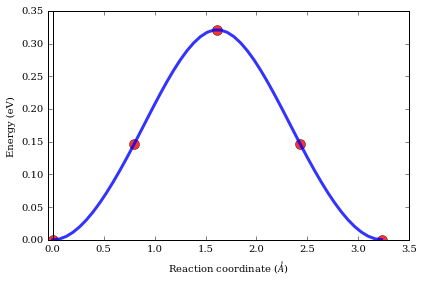

({'barrier': 0.32107652044765422}, [])

In [8]:
header.warnings = 'yY' #control warning levels: n, e, y, Y

res_loop('LiFePO4.n3Li1v1', 'ion_relax', [1,2,3,4,5], show = 'fomepp', analys_type = 'neb'  )

# Other regimes:

## Start: atom number; End: find interstitial void

In [ ]:
add_neb(RbVl, ise_new = '1u', images = 5, r_impurity = 1.5, search_type = 'existing_voids',
                        i_atom_to_move = 1,  i_void_final = None) #

## Start: atom number; End: xred coordinates of void

In [ ]:
# xr_final is coordinates of final position - void
it = add_neb(RbVl, ise_new = '1u', images = 5,
                        i_atom_to_move = 2,  xr_final = [0.2, 0.1, 0.3], i_void_final = 10) # *i_void_final*  is needed here only for producing unique name

## Use external files for NEB (version >1.1.0 is required ) 

In [ ]:
# here 'NEB_by_lain' is external folder with geo files for NEB in VASP format, i.e. POSCAR files in 00, 01, 02 ... subfolders
add_neb(init_neb_geo_fld = 'NEB_by_lain/',
        it_new = 'Ag9Bi4S4Cl8', ise_new = '1', it_new_folder = 'AgBiSCl/neb' )
# res('Ag9Bi4S4Cl8', '1', range(1,8), show = 'fomepp.neb_geo', analys_type = 'neb'  )

# Additional parameters:

In [ ]:
#1. produce xyz trajectory and shift cell
res_loop(show = 'neb_geo', params = {'mep_shift_vector':(0.,0.5,0.5)}) 